In [1]:
### Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import sklearn
import statsmodels
import warnings 
warnings.filterwarnings("ignore")


import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [2]:
# Read the dataset
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Understand the number of columns and rows
df.shape

(39717, 111)

### Data Pre-processing & cleaning

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
col_list=['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade',
      'emp_title','emp_length','home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose',
      'addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record',
      'open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
      'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
       'last_pymnt_amnt','last_credit_pull_d','pub_rec_bankruptcies']

In [6]:
df = df[col_list]

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


In [9]:
df.dtypes.value_counts()

float64    17
object     16
int64      10
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [11]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
mths_since_last_record,36931,0.929854
mths_since_last_delinq,25682,0.646625
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
revol_util,50,0.001259
last_credit_pull_d,2,0.000050
recoveries,0,0.000000
total_rec_late_fee,0,0.000000


In [12]:
print('There are multiple columns with missing values, we will drop these columns.')

There are multiple columns with missing values, we will drop these columns.


In [13]:
df.drop(['mths_since_last_record', 'mths_since_last_delinq'], axis=1, inplace=True)

In [14]:
#since id and member_id is the individual number, we will drop these two as well
df.drop(['id', 'member_id'], axis=1, inplace=True)

In [15]:
##Identify duplicates records in the data
dups = df.duplicated()
sum(dups)

0

In [16]:
print('There are no duplicate values in the dataset.')

There are no duplicate values in the dataset.


In [17]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Univariate Analysis of Numerical Variable

In [18]:
def univariateAnalysis(column,nbins):
    print("Description of " + column)
    print(df[column].describe(),end=' ')
    print("----------------------------------------------------------------------------")
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='orange');
    plt.title("Histogram Plot of " + column)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.title("Boxplot of " + column)
    plt.show()

In [19]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
numericcolumns = list(df_num.columns.values)
len(numericcolumns)

23

Description of loan_amnt
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64 ----------------------------------------------------------------------------
Distribution of loan_amnt
----------------------------------------------------------------------------


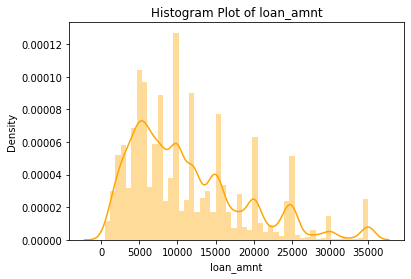

BoxPlot of loan_amnt
----------------------------------------------------------------------------


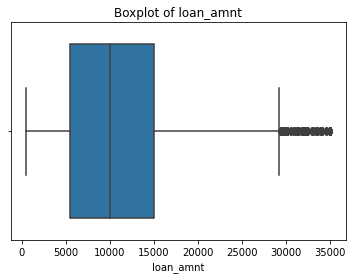

Description of funded_amnt
count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64 ----------------------------------------------------------------------------
Distribution of funded_amnt
----------------------------------------------------------------------------


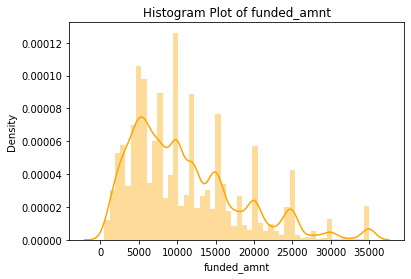

BoxPlot of funded_amnt
----------------------------------------------------------------------------


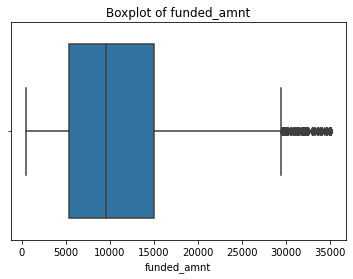

Description of funded_amnt_inv
count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64 ----------------------------------------------------------------------------
Distribution of funded_amnt_inv
----------------------------------------------------------------------------


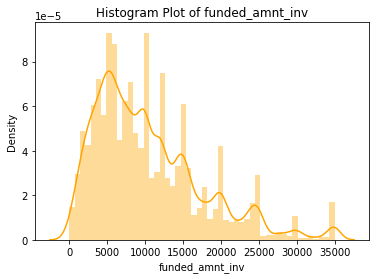

BoxPlot of funded_amnt_inv
----------------------------------------------------------------------------


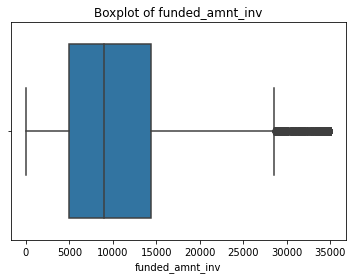

Description of installment
count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64 ----------------------------------------------------------------------------
Distribution of installment
----------------------------------------------------------------------------


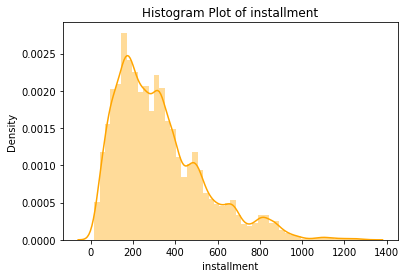

BoxPlot of installment
----------------------------------------------------------------------------


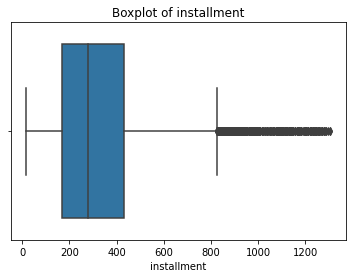

Description of annual_inc
count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64 ----------------------------------------------------------------------------
Distribution of annual_inc
----------------------------------------------------------------------------


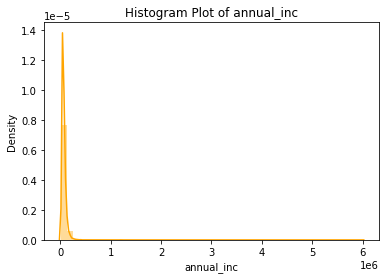

BoxPlot of annual_inc
----------------------------------------------------------------------------


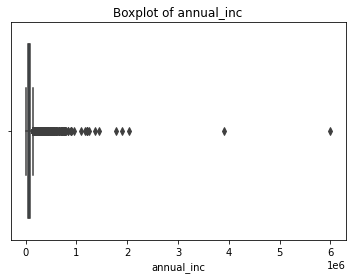

Description of dti
count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64 ----------------------------------------------------------------------------
Distribution of dti
----------------------------------------------------------------------------


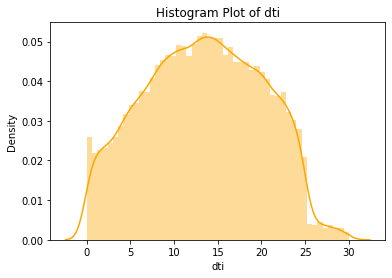

BoxPlot of dti
----------------------------------------------------------------------------


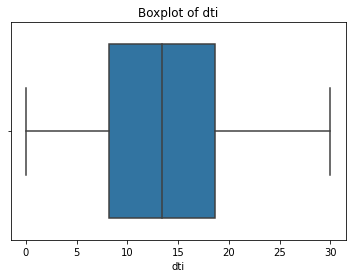

Description of delinq_2yrs
count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64 ----------------------------------------------------------------------------
Distribution of delinq_2yrs
----------------------------------------------------------------------------


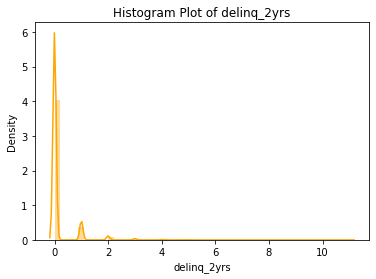

BoxPlot of delinq_2yrs
----------------------------------------------------------------------------


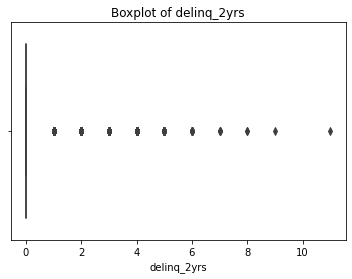

Description of inq_last_6mths
count    39717.000000
mean         0.869200
std          1.070219
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64 ----------------------------------------------------------------------------
Distribution of inq_last_6mths
----------------------------------------------------------------------------


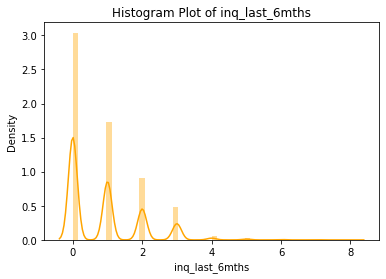

BoxPlot of inq_last_6mths
----------------------------------------------------------------------------


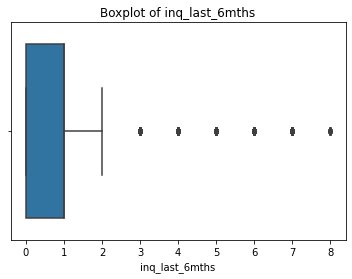

Description of open_acc
count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64 ----------------------------------------------------------------------------
Distribution of open_acc
----------------------------------------------------------------------------


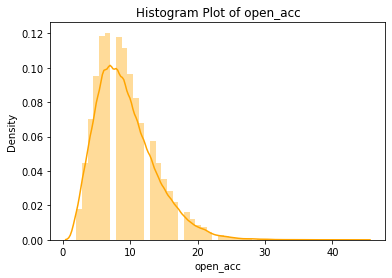

BoxPlot of open_acc
----------------------------------------------------------------------------


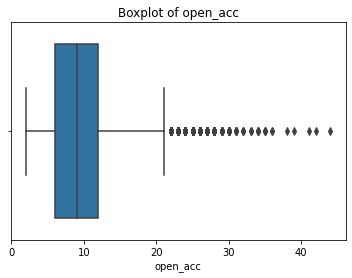

Description of pub_rec
count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64 ----------------------------------------------------------------------------
Distribution of pub_rec
----------------------------------------------------------------------------


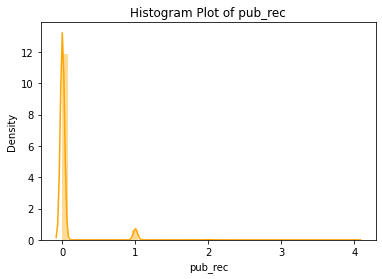

BoxPlot of pub_rec
----------------------------------------------------------------------------


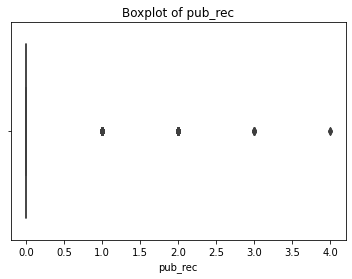

Description of revol_bal
count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64 ----------------------------------------------------------------------------
Distribution of revol_bal
----------------------------------------------------------------------------


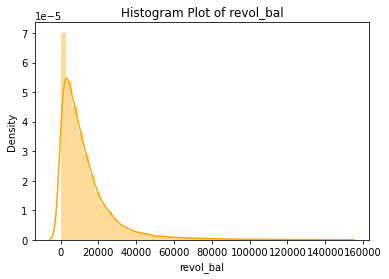

BoxPlot of revol_bal
----------------------------------------------------------------------------


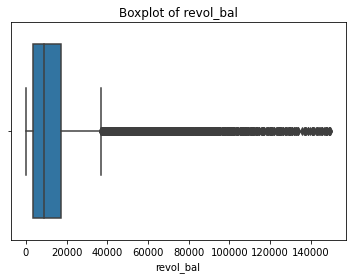

Description of total_acc
count    39717.000000
mean        22.088828
std         11.401709
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64 ----------------------------------------------------------------------------
Distribution of total_acc
----------------------------------------------------------------------------


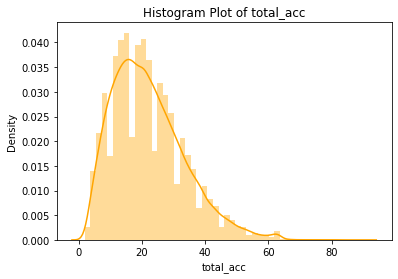

BoxPlot of total_acc
----------------------------------------------------------------------------


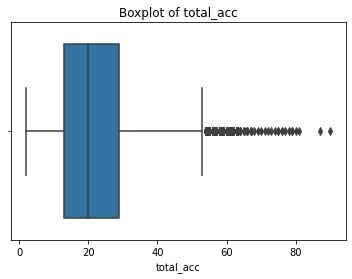

Description of out_prncp
count    39717.000000
mean        51.227887
std        375.172839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64 ----------------------------------------------------------------------------
Distribution of out_prncp
----------------------------------------------------------------------------


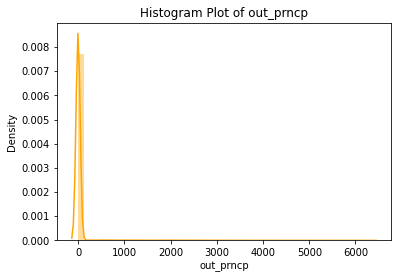

BoxPlot of out_prncp
----------------------------------------------------------------------------


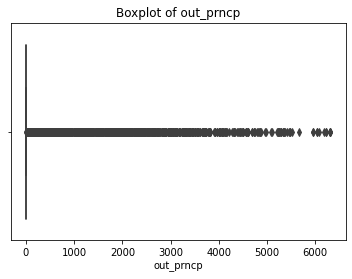

Description of out_prncp_inv
count    39717.000000
mean        50.989768
std        373.824457
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64 ----------------------------------------------------------------------------
Distribution of out_prncp_inv
----------------------------------------------------------------------------


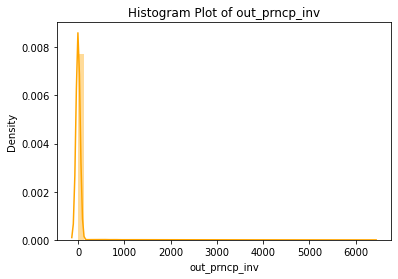

BoxPlot of out_prncp_inv
----------------------------------------------------------------------------


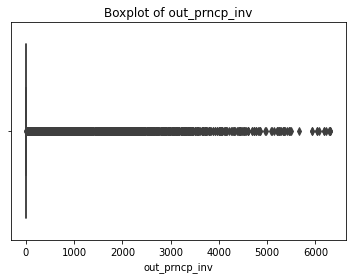

Description of total_pymnt
count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64 ----------------------------------------------------------------------------
Distribution of total_pymnt
----------------------------------------------------------------------------


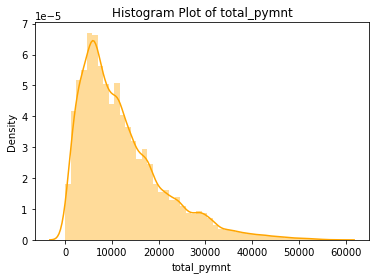

BoxPlot of total_pymnt
----------------------------------------------------------------------------


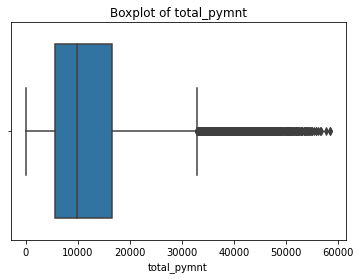

Description of total_pymnt_inv
count    39717.000000
mean     11567.149118
std       8942.672613
min          0.000000
25%       5112.310000
50%       9287.150000
75%      15798.810000
max      58563.680000
Name: total_pymnt_inv, dtype: float64 ----------------------------------------------------------------------------
Distribution of total_pymnt_inv
----------------------------------------------------------------------------


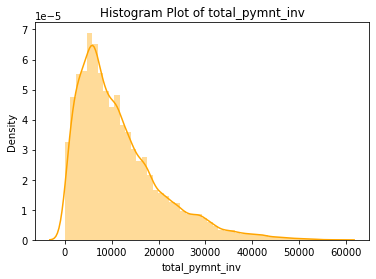

BoxPlot of total_pymnt_inv
----------------------------------------------------------------------------


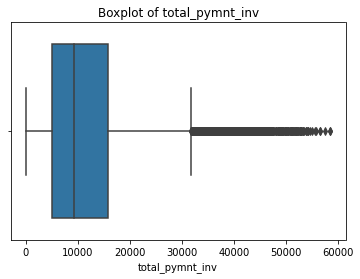

Description of total_rec_prncp
count    39717.000000
mean      9793.348813
std       7065.522127
min          0.000000
25%       4600.000000
50%       8000.000000
75%      13653.260000
max      35000.020000
Name: total_rec_prncp, dtype: float64 ----------------------------------------------------------------------------
Distribution of total_rec_prncp
----------------------------------------------------------------------------


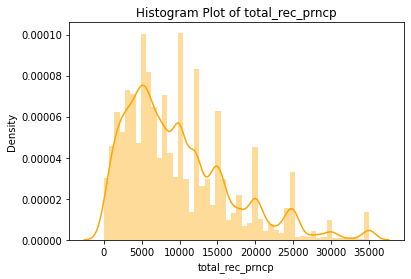

BoxPlot of total_rec_prncp
----------------------------------------------------------------------------


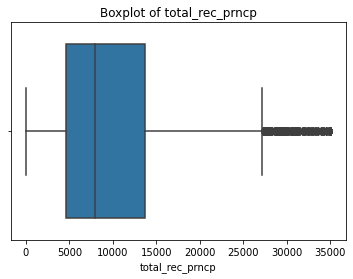

Description of total_rec_int
count    39717.000000
mean      2263.663172
std       2608.111964
min          0.000000
25%        662.180000
50%       1348.910000
75%       2833.400000
max      23563.680000
Name: total_rec_int, dtype: float64 ----------------------------------------------------------------------------
Distribution of total_rec_int
----------------------------------------------------------------------------


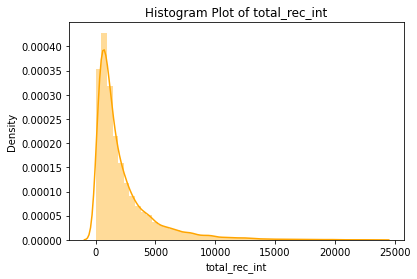

BoxPlot of total_rec_int
----------------------------------------------------------------------------


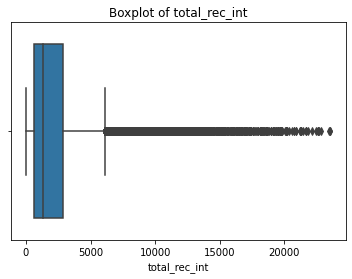

Description of total_rec_late_fee
count    39717.000000
mean         1.363015
std          7.289979
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64 ----------------------------------------------------------------------------
Distribution of total_rec_late_fee
----------------------------------------------------------------------------


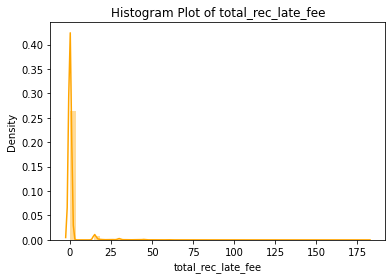

BoxPlot of total_rec_late_fee
----------------------------------------------------------------------------


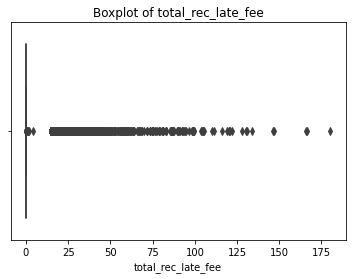

Description of recoveries
count    39717.000000
mean        95.221624
std        688.744771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64 ----------------------------------------------------------------------------
Distribution of recoveries
----------------------------------------------------------------------------


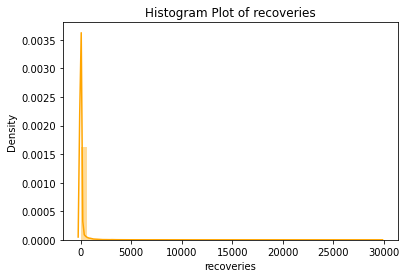

BoxPlot of recoveries
----------------------------------------------------------------------------


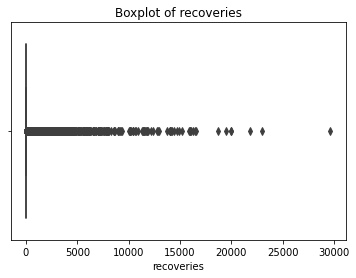

Description of collection_recovery_fee
count    39717.000000
mean        12.406112
std        148.671593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64 ----------------------------------------------------------------------------
Distribution of collection_recovery_fee
----------------------------------------------------------------------------


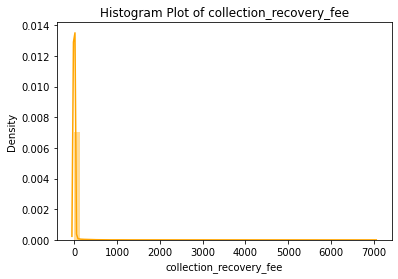

BoxPlot of collection_recovery_fee
----------------------------------------------------------------------------


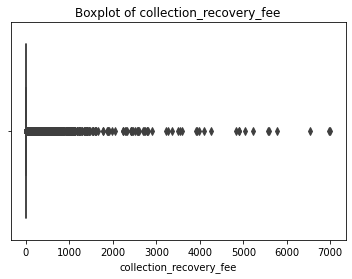

Description of last_pymnt_amnt
count    39717.000000
mean      2678.826162
std       4447.136012
min          0.000000
25%        218.680000
50%        546.140000
75%       3293.160000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64 ----------------------------------------------------------------------------
Distribution of last_pymnt_amnt
----------------------------------------------------------------------------


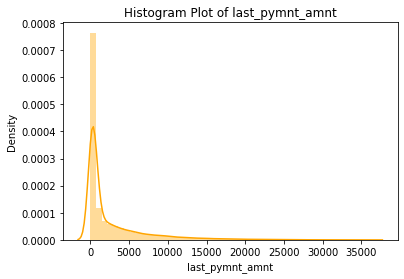

BoxPlot of last_pymnt_amnt
----------------------------------------------------------------------------


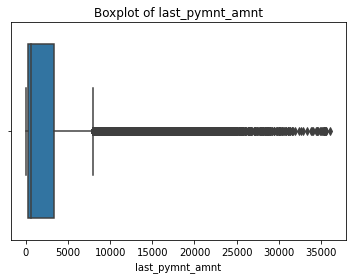

Description of pub_rec_bankruptcies
count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64 ----------------------------------------------------------------------------
Distribution of pub_rec_bankruptcies
----------------------------------------------------------------------------


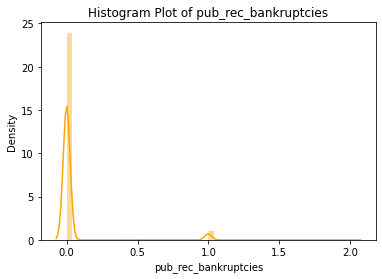

BoxPlot of pub_rec_bankruptcies
----------------------------------------------------------------------------


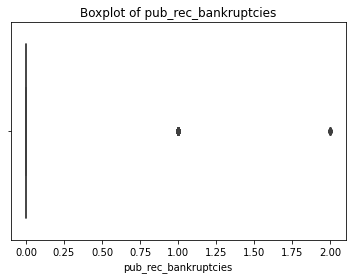

In [20]:
for x in numericcolumns:
    univariateAnalysis(x,39)

### Univariate Analysis of Categorical Variable

In [21]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TERM :  2
 60 months    10621
 36 months    29096
Name: term, dtype: int64


INT_RATE :  371
21.48%      1
16.20%      1
17.54%      1
18.36%      1
17.34%      1
         ... 
7.88%     725
7.51%     787
11.49%    825
13.49%    826
10.99%    956
Name: int_rate, Length: 371, dtype: int64


GRADE :  7
G      316
F     1049
E     2842
D     5307
C     8098
A    10085
B    12020
Name: grade, dtype: int64


SUB_GRADE :  35
G5      30
G3      48
G4      56
G2      78
G1     104
F5     118
F4     168
F3     185
F2     249
F1     329
E5     416
E4     454
E3     553
E2     656
E1     763
D5     874
D1     931
D4     981
A1    1139
D3    1173
C5    1186
C4    1236
D2    1348
A2    1508
C3    1529
A3    1810
B1    1830
C2    2011
B2    2057
C1    2136
B4    2512
B5    2704
A5    2742
A4    2886
B3    2917
Name: sub_grade, dtype: int64


EMP_TITLE :  28820
Jujamcyn Theaters                        1
Mayo Foundtion                           1
First National Bank of Pennsylvania      1
Expedia  Inc

In [43]:
def univariate_categorical(column,nbins):
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(df[column], hue=df["loan_status"]);
    plt.title("CountPlot of " + column + " vs Loan Status")
    plt.show()

In [47]:
df_cat = pd.DataFrame(df[['term','grade', 'emp_length','home_ownership','verification_status','purpose',
                          'addr_state']])

In [48]:
#df_cat = df.select_dtypes(include = ['object'])
catergoriccolumns = list(df_cat.columns.values)
len(catergoriccolumns)

7

Countplot of term
----------------------------------------------------------------------------


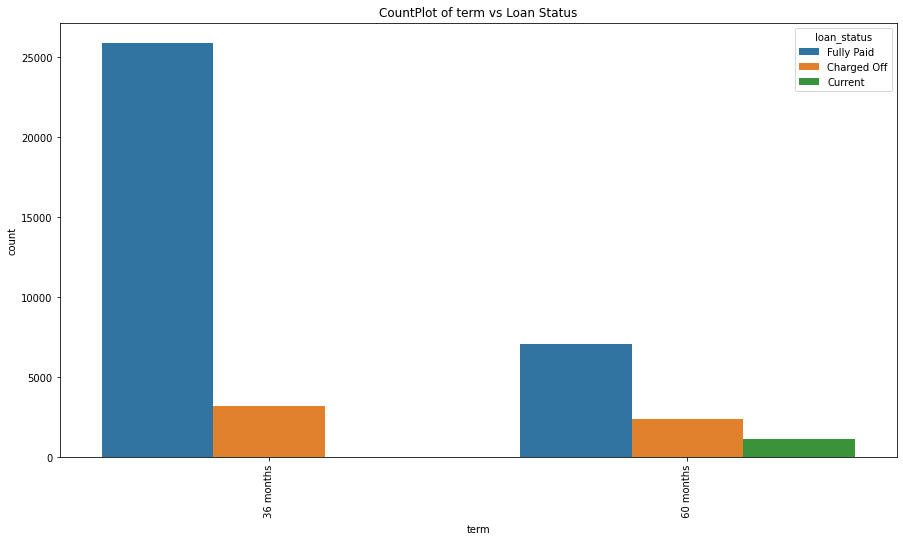

Countplot of grade
----------------------------------------------------------------------------


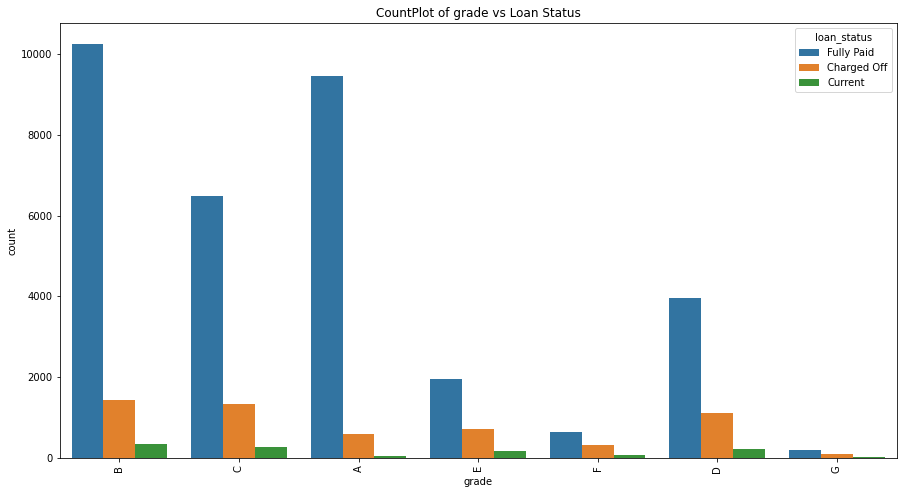

Countplot of emp_length
----------------------------------------------------------------------------


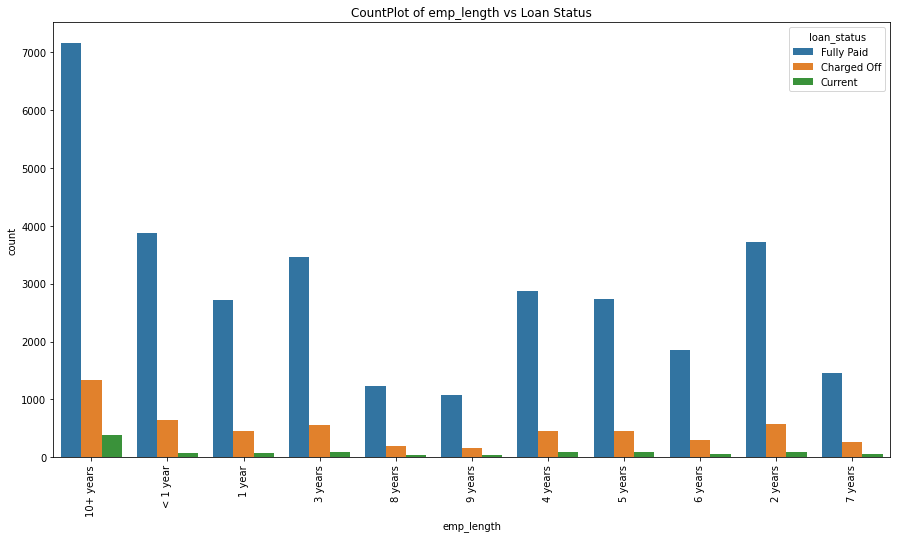

Countplot of home_ownership
----------------------------------------------------------------------------


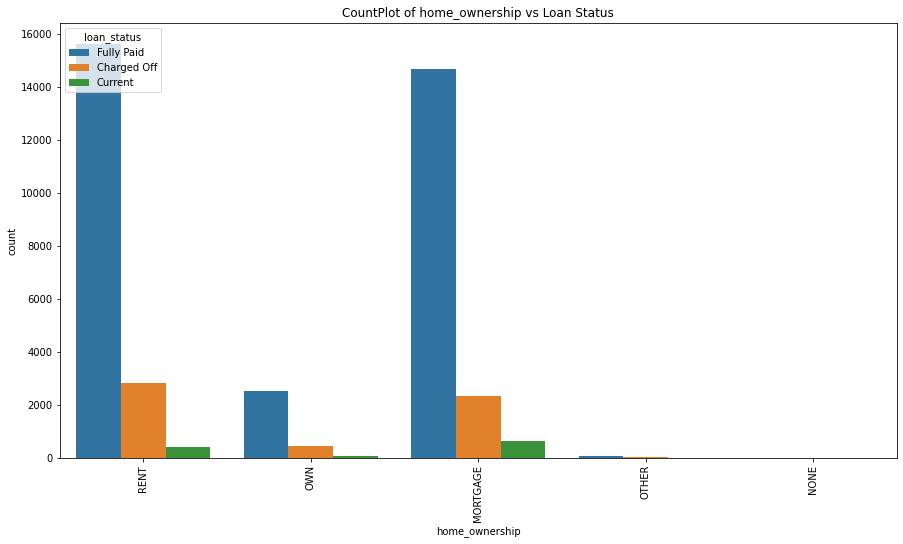

Countplot of verification_status
----------------------------------------------------------------------------


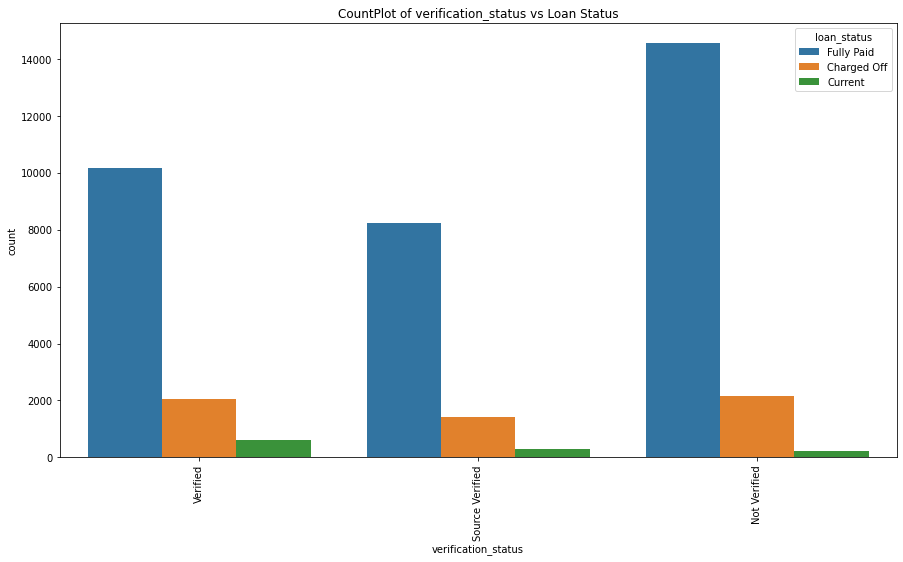

Countplot of purpose
----------------------------------------------------------------------------


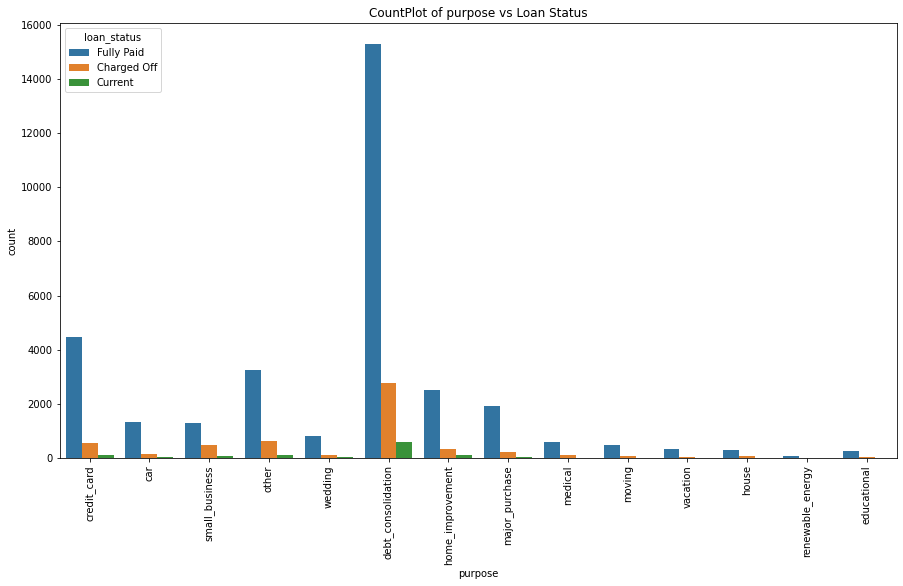

Countplot of addr_state
----------------------------------------------------------------------------


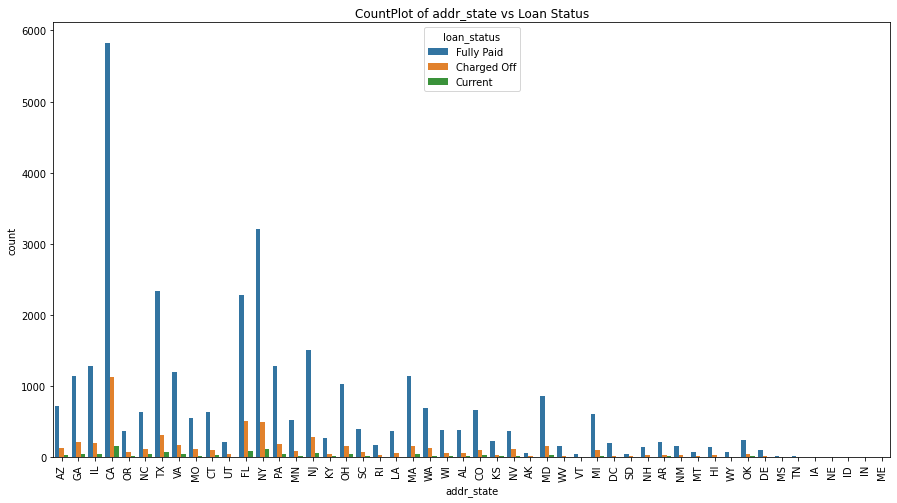

In [49]:
for x in catergoriccolumns:
    univariate_categorical(x,7)

### Bi-variate Analysis

In [50]:
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,0.177168,-0.051236,...,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180
funded_amnt,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,0.175530,-0.052169,...,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502
funded_amnt_inv,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.163027,-0.053214,...,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746
installment,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,0.172812,-0.046532,...,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.034103
annual_inc,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,0.158200,-0.018689,...,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016801
dti,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.288045,-0.004621,...,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.005691
delinq_2yrs,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,0.011656,0.007463,...,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,0.003375
inq_last_6mths,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,0.091713,0.024802,...,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,0.016346
open_acc,0.177168,0.175530,0.163027,0.172812,0.158200,0.288045,0.011656,0.091713,1.000000,0.000172,...,0.028514,0.162663,0.152937,0.160631,0.124499,-0.018627,0.016396,0.006219,0.078865,0.005930
pub_rec,-0.051236,-0.052169,-0.053214,-0.046532,-0.018689,-0.004621,0.007463,0.024802,0.000172,1.000000,...,-0.012910,-0.053668,-0.054101,-0.065384,-0.007470,-0.002071,-0.005521,-0.005536,-0.032214,0.847305


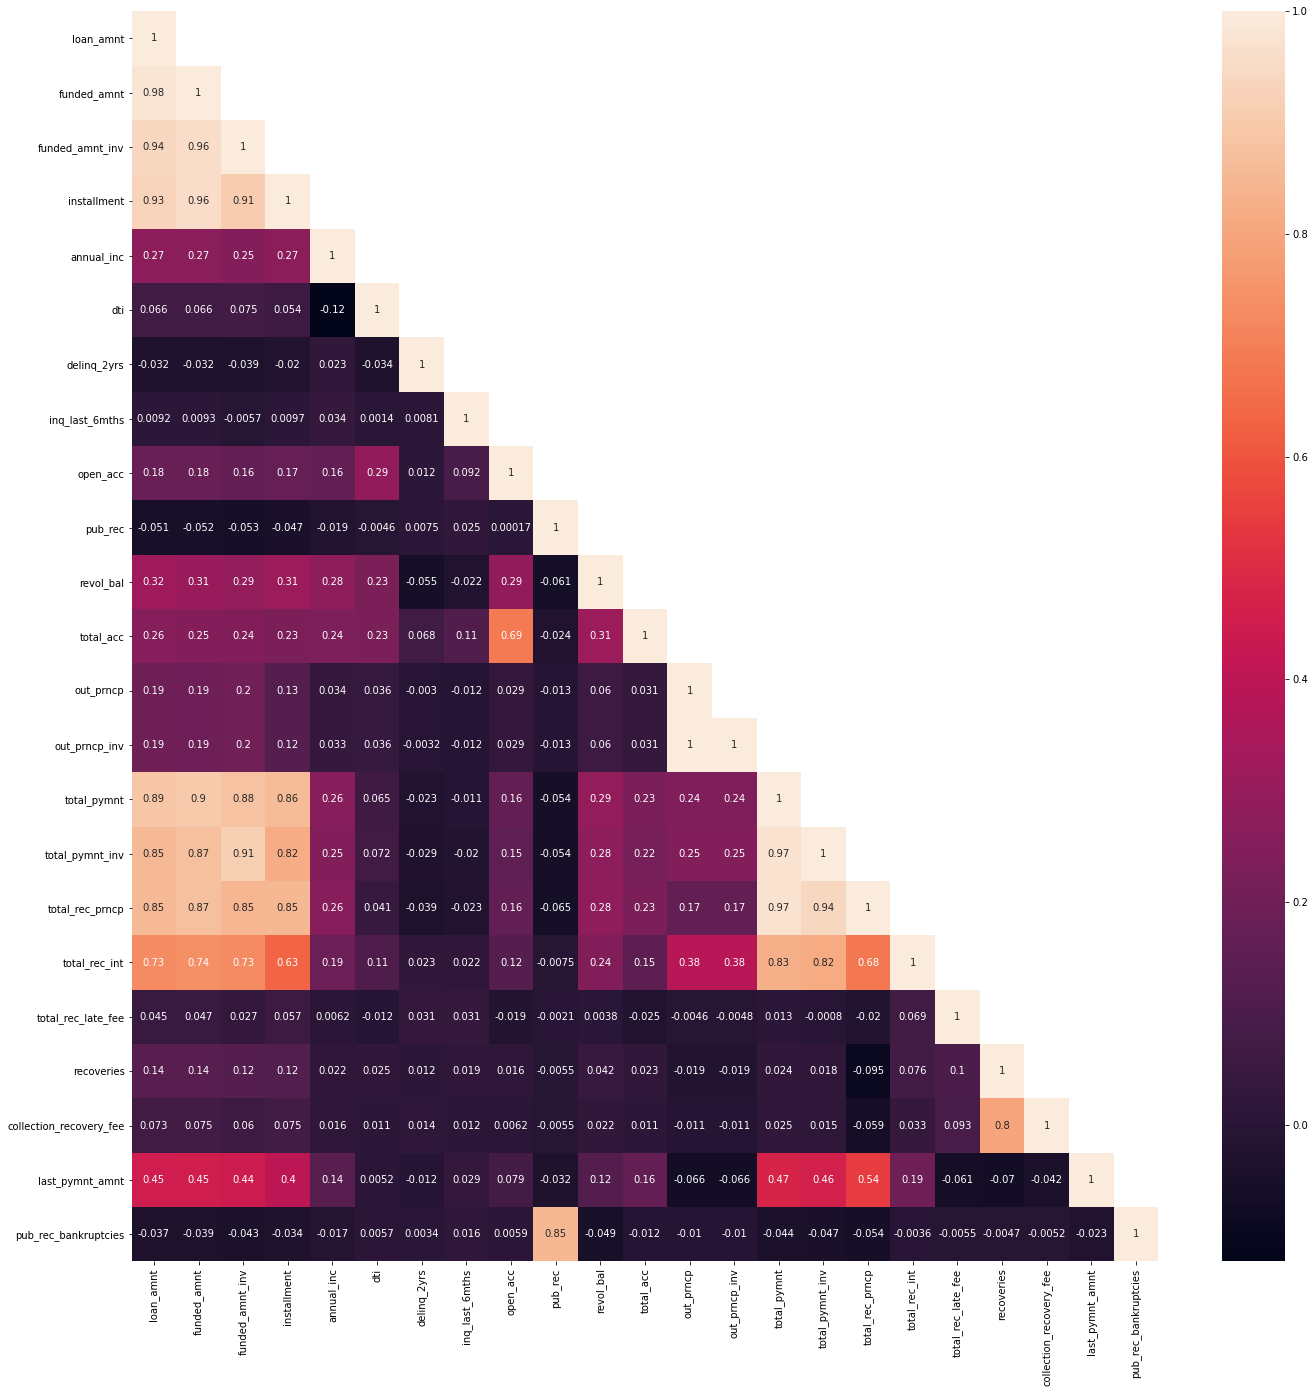

In [54]:
plt.figure(figsize=(23,23))
sns.heatmap(df.corr(),annot=True, mask=np.triu(df.corr(),+1));

In [ ]:
sns.pairplot(numericcolumns, diag_kind = 'kde');